In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

time: 570 ms (started: 2022-11-13 13:41:06 +00:00)


number of end_epoch: 5000


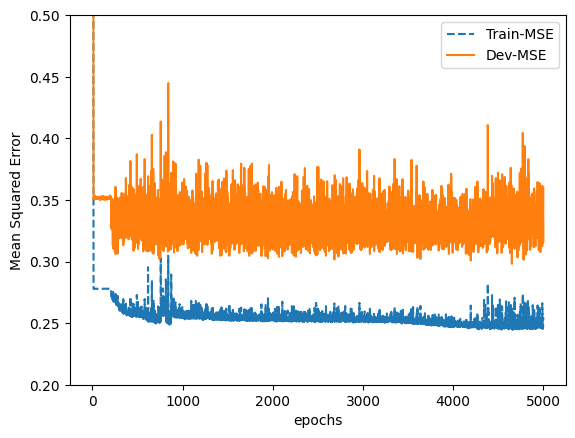

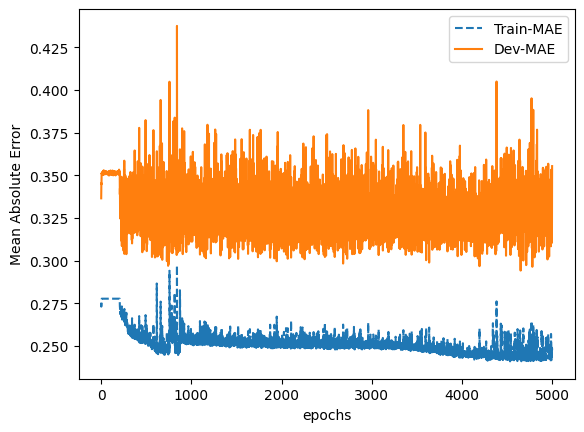

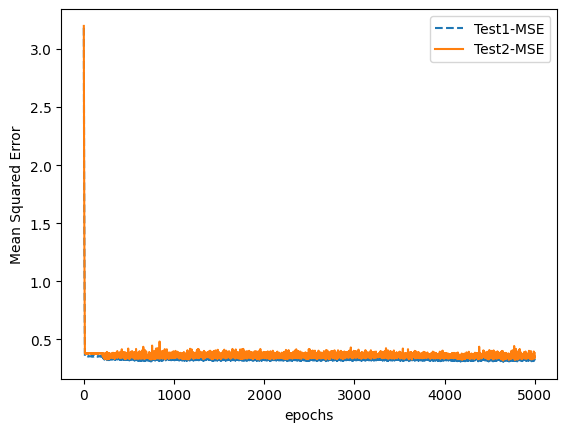

< OPT. SCORE_TOTAL EPOCH  1947 > : -3.432871545323029
opt. DEV MSE :  0.3026808798313141
opt. TEST1 MSE :  0.3136927485466003
opt. TEST2 MSE :  0.3260232508182525
time: 281 ms (started: 2022-11-13 13:46:18 +00:00)


In [5]:
ELBOW = 5

scores = pd.read_csv("../rebuild_hybrid_model/results/sp500_20082017-train_train-kS_hyper_lstm_evaluation.csv")
mse_columns = ['TRAIN_MSE','DEV_MSE']
mae_columns = ['TRAIN_MAE','DEV_MAE']
test_columns = ['TEST1_MSE', 'TEST2_MSE']

#print(scores)

end_epoch = scores.shape[0]
print(f"number of end_epoch: {end_epoch}")
plt.plot(scores[mse_columns[0]][:end_epoch],'--', label="Train-MSE")
plt.plot(scores[mse_columns[1]][:end_epoch], label="Dev-MSE")
plt.legend()
plt.ylim([0.2, 0.5])
plt.xlabel('epochs')
plt.ylabel('Mean Squared Error')
plt.show()
plt.close()
plt.plot(scores[mae_columns[0]][:end_epoch],'--', label="Train-MAE")
plt.plot(scores[mae_columns[1]][:end_epoch], label="Dev-MAE")
plt.legend()
plt.xlabel('epochs')
plt.ylabel('Mean Absolute Error')
plt.show()
plt.close()
plt.plot(scores[test_columns[0]][:end_epoch],'--', label="Test1-MSE")
plt.plot(scores[test_columns[1]][:end_epoch], label="Test2-MSE")
plt.legend()
plt.xlabel('epochs')
plt.ylabel('Mean Squared Error')
plt.show()
plt.close()



mse_columns = ['TRAIN_MSE','DEV_MSE']
score_diff = (scores[mse_columns[1]]-scores[mse_columns[0]])[ELBOW:]
score_sum = (scores[mse_columns[1]]+scores[mse_columns[0]])[ELBOW:]
score_diff = (scores['DEV_MSE'] - scores['TRAIN_MSE'])
score_sum = (scores['DEV_MSE'] + scores['TRAIN_MSE'])

score_diff_norm = (score_diff - np.mean(score_diff))/np.std(score_diff)
score_sum_norm = (score_sum - np.mean(score_sum))/np.std(score_sum)
score_total = score_diff_norm + score_sum_norm
idx = np.argmin(score_total)
print('< OPT. SCORE_TOTAL EPOCH ',str(idx+1),'> : '+str(score_total[idx]))
print('opt. DEV MSE : ',str(scores[mse_columns[1]][idx]))
print('opt. TEST1 MSE : ',str(scores[test_columns[0]][idx]))
print('opt. TEST2 MSE : ',str(scores[test_columns[1]][idx]))

In [19]:
print(idx)
for i in range(4510, 4610):
    print(i+1, score_total[i])

831
4511 -0.2571996834049445
4512 -0.7222270032434702
4513 0.8945605920592813
4514 0.5539895451522543
4515 0.14038754602113032
4516 1.2425383561921821
4517 0.7022488565483307
4518 2.719222445745285
4519 -1.322659271777246
4520 0.9140354736212708
4521 0.6889908538498022
4522 0.981193553000341
4523 -0.2886269556108872
4524 -0.27772705184598834
4525 1.379245017588163
4526 0.8929906574963071
4527 1.0743802820495731
4528 -0.736660771852169
4529 1.962205795384238
4530 1.3451205529911758
4531 0.4872807837880102
4532 0.43746593758696195
4533 -0.05678692812638138
4534 0.9080127056052435
4535 -0.7325027093890313
4536 -0.24683673081943558
4537 1.734259136926156
4538 -1.2781213036333257
4539 0.9294016746699194
4540 1.1351229342396303
4541 2.1399770649417764
4542 0.877885245600558
4543 0.7912787936056045
4544 -0.4573979299752313
4545 0.5144248437894403
4546 0.919567880234368
4547 0.544921507821173
4548 1.5009893948929136
4549 0.9247079230553108
4550 0.5263266256534781
4551 1.1036939547762785
4552 -